수치를 입력해서 수치를 예측하는 모델들에 대해서 알아보겠습니다. 수치예측을 위한 데이터셋 생성을 해보고, 선형회귀를 위한 가장 간단한 퍼셉트론 신경망 모델부터 깊은 다층퍼셉트론 신경망 모델까지 구성 및 학습을 시켜보겠습니다

---
### 데이터셋 준비

입력 x에 대해 2를 곱해 두 배 정도 값을 갖는 출력 y가 되도록 데이터셋을 생성해봤습니다. 선형회귀 모델을 사용한다면 Y = w * X + b 일 때, w가 2에 가깝고, b가 0.16에 가깝게 되도록 학습시키는 것이 목표입니다.

In [32]:
import numpy as np

# 데이터셋 생성
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [33]:
np.random.random(1)

array([0.27316282])

In [34]:
np.random.random(10)

array([0.96376744, 0.42844743, 0.93669373, 0.79207896, 0.13274795,
       0.01960757, 0.38559726, 0.66273568, 0.65063766, 0.99878071])

In [36]:
np.random.random((10,2))

array([[0.42139745, 0.61421768],
       [0.01678797, 0.40242976],
       [0.65547378, 0.3940301 ],
       [0.67949076, 0.303946  ],
       [0.45665071, 0.26686815],
       [0.54357989, 0.5543356 ],
       [0.48232992, 0.93729166],
       [0.14171451, 0.54259208],
       [0.54330347, 0.56923872],
       [0.33070891, 0.27414893]])

In [37]:
x_train.shape

(1000, 1)

In [38]:
y_train.shape

(1000, 1)

In [41]:
x_train[:10]

array([[0.88421804],
       [0.91511513],
       [0.54378808],
       [0.59385181],
       [0.03201887],
       [0.76270225],
       [0.64428251],
       [0.61822492],
       [0.76956038],
       [0.14003804]])

In [42]:
y_train[:10]

array([[2.09995086],
       [1.93963235],
       [1.3760313 ],
       [1.27838071],
       [0.07840304],
       [1.72547768],
       [1.5552972 ],
       [1.38205329],
       [1.77009014],
       [0.33879832]])

In [43]:
x_test.shape

(100, 1)

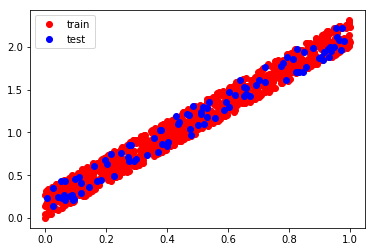

In [3]:
# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_5.png)

---
### 레이어 준비

본 장에서 사용되는 블록들은 다음과 같습니다.

|블록|이름|설명|
|:-:|:-:|:-|
|![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Dataset_Vector_s.png)|Input data, Labels|1차원의 입력 데이터 및 라벨입니다.|
|![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Dense_s.png)|Dense|모든 입력 뉴런과 출력 뉴런을 연결하는 전결합층입니다.|
|![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Activation_Relu_s.png)|relu|활성화 함수로 주로 은닉층에 사용됩니다.|

---
### 모델 준비

수치예측을 하기 위해 `선형회귀 모델`, `퍼셉트론 신경망 모델`, `다층퍼셉트론 신경망 모델`, `깊은 다층퍼셉트론 신경망 모델`을 준비했습니다.

#### 선형회귀 모델

가장 간단한 1차 선형회귀 모델로 수치예측을 해보겠습니다. 아래 식에서 x, y는 우리가 만든 데이터셋이고, 회귀분석을 통해서, w와 b값을 구하는 것이 목표입니다. 

    Y = w * X + b
   
w와 b값을 구하게 되면, 임의의 입력 x에 대해서 출력 y가 나오는 데 이것이 예측 값입니다. w, b 값은 분산, 공분산, 평균을 이용하여 쉽게 구할 수 있습니다. 

    w = np.cov(X, Y, bias=1)[0,1] / np.var(X)
    b = np.average(Y) - w * np.average(X)
    
간단한 수식이지만 이 수식을 도출하기란 꽤나 복잡습니다. 오차를 최소화하는 극대값을 구하기 위해 편미분을 수행하고, 다시 식을 전개하는 등등의 과정이 필요합니다.

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_0.png)    

#### 퍼셉트론 신경망 모델

Dense 레이어가 하나이고, 뉴런의 수도 하나인 가장 기본적인 퍼셉트론 모델입니다. 즉 웨이트(w) 하나, 바이어스(b) 하나로 전형적인 Y = w * X + b를 풀기 위한 모델입니다. 수치 예측을 하기 위해서 출력 레이어에 별도의 활성화 함수를 사용하지 않았습니다. w, b 값이 손으로 푼 선형회귀 최적해에 근접하려면 경우에 따라 만번이상의 에포크가 필요합니다. 실제로 사용하지는 않는 모델이지만 선형회귀부터 공부하시는 분들에게는 입문 모델로 나쁘지 않습니다.

    model = Sequential()
    model.add(Dense(1, input_dim=1))
        
![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_1m.png)

#### 다층퍼셉트론 신경망 모델

Dense 레이어가 두 개인 다층퍼셉트론 모델입니다. 첫 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 두 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(1))

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_2m.png)

#### 깊은 다층퍼셉트론 신경망 모델

Dense 레이어가 총 세 개인 다층퍼셉트론 모델입니다. 첫 번째, 두 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_3m.png)    

---
### 전체 소스

앞서 살펴본 `선형회귀 모델`, `퍼셉트론 신경망 모델`, `다층퍼셉트론 신경망 모델`, `깊은 다층퍼셉트론 신경망 모델`의 전체 소스는 다음과 같습니다. 

#### 선형회귀 모델

In [46]:
# 0. 사용할 패키지 불러오기
import numpy as np
from sklearn.metrics import mean_squared_error
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [49]:
x_train = x_train.reshape(1000,)
y_train = y_train.reshape(1000,)
x_test = x_test.reshape(100,)
y_test = y_test.reshape(100,)

In [50]:
# 2. 모델 구성하기
w = np.cov(x_train, y_train, bias=1)[0,1] / np.var(x_train)
b = np.average(y_train) - w * np.average(x_train)

print w, b

2.0022520351637603 0.16390785043269807


In [53]:
np.cov(x_train, y_train, bias=1)

array([[0.08378184, 0.16775236],
       [0.16775236, 0.34530847]])

In [54]:
np.cov(x_train, y_train, bias=1)[0,1]

0.16775236379462966

In [55]:
np.var(x_train)

0.08378184207010159

In [56]:
x_test[:10]

array([0.39486336, 0.87061356, 0.03439399, 0.68031197, 0.92376035,
       0.95592556, 0.5476946 , 0.2488568 , 0.05674763, 0.04044443])

In [57]:
# 3. 모델 평가하기
y_predict = w * x_test + b
mse = mean_squared_error(y_test, y_predict)
print('mse : ' + str(mse))

mse : 0.009494342123299243


In [59]:
y_test[:10]

array([0.93206348, 1.79448526, 0.31903161, 1.38408604, 1.9533866 ,
       1.9957651 , 1.11298363, 0.65489717, 0.28150338, 0.20755533])

In [60]:
y_predict[:10]

array([0.95452382, 1.90709562, 0.23277328, 1.52606388, 2.01350889,
       2.07791174, 1.26053047, 0.66218189, 0.2775309 , 0.2448878 ])

#### 퍼셉트론 신경망 신경망 모델

In [8]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

Using TensorFlow backend.


In [9]:
# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [10]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=1))

In [11]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
1000/1000 [==============================] - 0s 196us/step - loss: 0.3478
Epoch 2/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.3164
Epoch 3/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.2904
Epoch 4/50
1000/1000 [==============================] - 0s 19us/step - loss: 0.2661
Epoch 5/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.2433
Epoch 6/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.2215
Epoch 7/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.2008
Epoch 8/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.1815
Epoch 9/50
1000/1000 [==============================] - 0s 17us/step - loss: 0.1632
Epoch 10/50
1000/1000 [==============================] - 0s 17us/step - loss: 0.1460
Epoch 11/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.1302
Epoch 12/50
1000/1000 [==============================] - 0s 28us/step - l

In [ ]:
w, b = model.get_weights()
print w, b

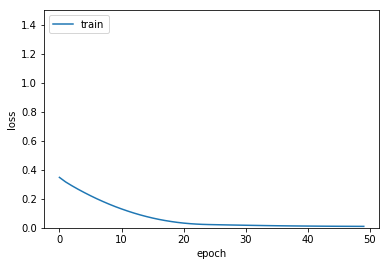

In [14]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

100/100 [==============================] - 0s 174us/step
loss : 0.00964302767999


#### 다층퍼셉트론 신경망 모델

In [16]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

In [17]:
# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [18]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

In [19]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
1000/1000 [==============================] - 0s 78us/step - loss: 1.2143
Epoch 2/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.8020
Epoch 3/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.5234
Epoch 4/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.3193
Epoch 5/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.1787
Epoch 6/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.0951
Epoch 7/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.0595
Epoch 8/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.0472
Epoch 9/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.0373
Epoch 10/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.0279
Epoch 11/50
1000/1000 [==============================] - 0s 29us/step - loss: 0.0203
Epoch 12/50
1000/1000 [==============================] - 0s 27us/step - lo

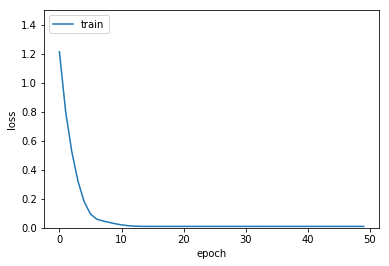

In [22]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [23]:
# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

100/100 [==============================] - 0s 191us/step
loss : 0.00849732551724


#### 깊은 다층퍼셉트론 신경망 모델

In [24]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

In [25]:
# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [26]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [27]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
1000/1000 [==============================] - 0s 91us/step - loss: 0.9955
Epoch 2/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.1790
Epoch 3/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.0342
Epoch 4/50
1000/1000 [==============================] - 0s 28us/step - loss: 0.0191
Epoch 5/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.0116
Epoch 6/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.0099
Epoch 7/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.0103
Epoch 8/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.0099
Epoch 9/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.0102
Epoch 10/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.0100
Epoch 11/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.0102
Epoch 12/50
1000/1000 [==============================] - 0s 22us/step - lo

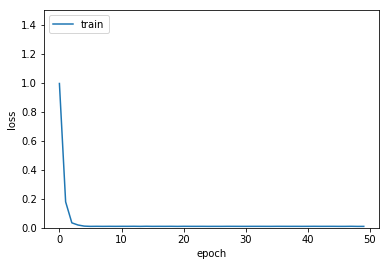

In [30]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [31]:
# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

100/100 [==============================] - 0s 211us/step
loss : 0.0114833716303


---

### 학습결과 비교

퍼셉트론 신경망 모델 > 다층퍼셉트론 신경망 모델 > 깊은 다층퍼셉트론 신경망 모델 순으로 학습이 좀 더 빨리 되는 것을 확인할 수 있습니다.

|퍼셉트론 신경망 모델|다층퍼셉트론 신경망 모델|깊은 다층퍼셉트론 신경망 모델|
|:-:|:-:|:-:|
|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_6.png)|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_7.png)|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_8.png)|

---

### 요약

수치예측을 위한 퍼셉트론 신경망 모델, 다층퍼셉트론 신경망 모델, 깊은 다층퍼셉트론 신경망 모델을 살펴보고, 그 성능을 확인 해봤습니다.

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_4m.png)